In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2


In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


In [3]:
example = "/users/btorres/database/ecommerce/images/train/patines/91ed40968ccd224527db2e37fbc5ed30_6.jpg"

image = cv2.imread(example)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

AttributeError: module 'cv2' has no attribute 'show'

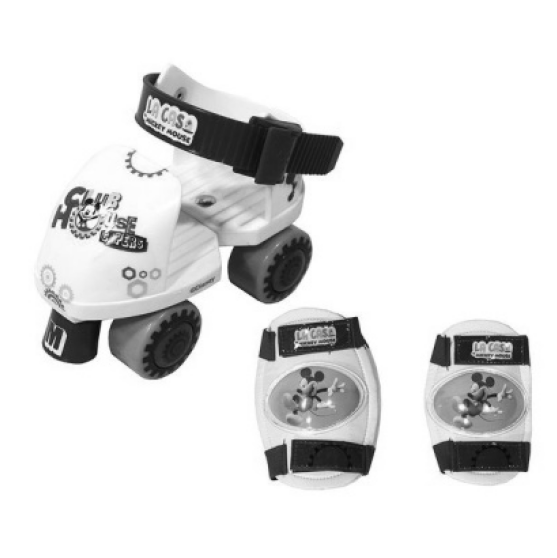

In [4]:

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()



In [10]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/users/btorres/redesNeuronales/weightFiles/segmentation_models/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [11]:
masks = mask_generator.generate(image)

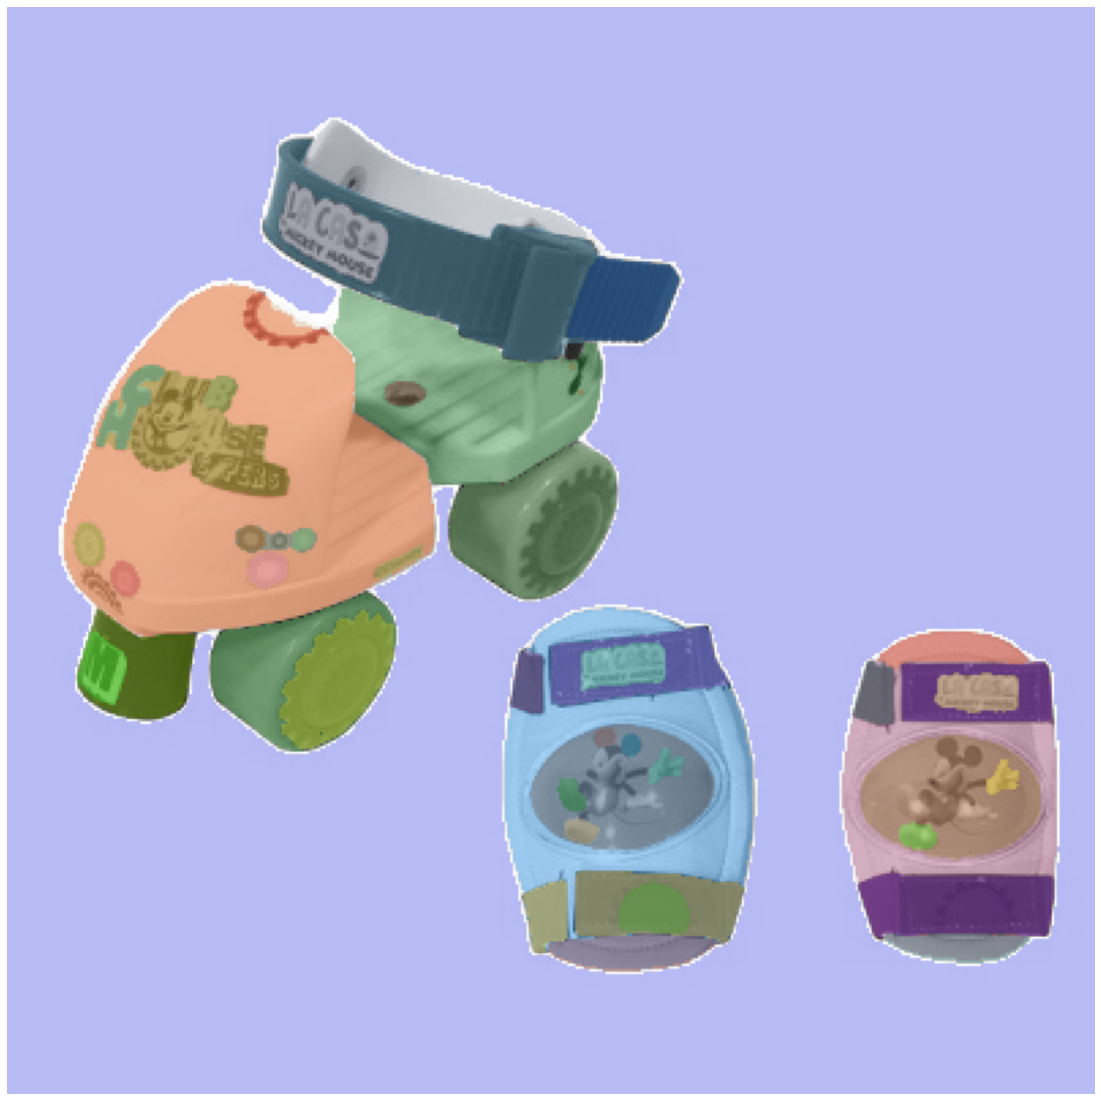

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()